<a href="https://colab.research.google.com/github/muajnstu/Comparative-Analysis-of-K-Nearest-Neighbors-Variants-for-Diabetes-Prediction-Using-Administrative-He/blob/main/basic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data_url = "https://raw.githubusercontent.com/muajnstu/Comparative-Analysis-of-K-Nearest-Neighbors-Variants-for-Diabetes-Prediction-Using-Administrative-He/refs/heads/main/update_dataframe%20(1).csv"
df = pd.read_csv(data_url)

In [ ]:
# Check the shape
print(f"Shape: {df.shape}")

# Data types and missing values
print(df.info())

# Basic statistics
print(df.describe())

Shape: (6636, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   AIDS/HIV                                 6636 non-null   int64
 1   Alcohol abuse                            6636 non-null   int64
 2   Blood loss anaemia                       6636 non-null   int64
 3   Cardiac arrhythmias                      6636 non-null   int64
 4   Chronic pulmonary disease                6636 non-null   int64
 5   Coagulopathy                             6636 non-null   int64
 6   Congestive heart failure                 6636 non-null   int64
 7   Deficiency anaemia                       6636 non-null   int64
 8   Depression                               6636 non-null   int64
 9   Diabetes (complicated)                   6636 non-null   int64
 10  Diabetes (uncomplicated)                 6636 non-null

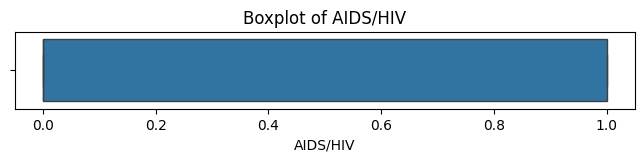

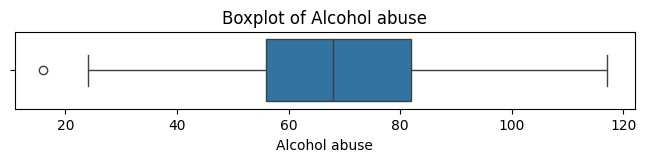

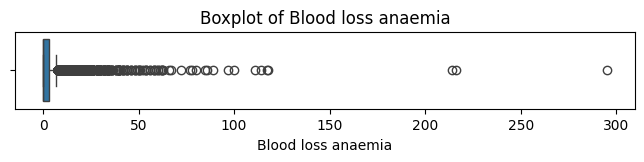

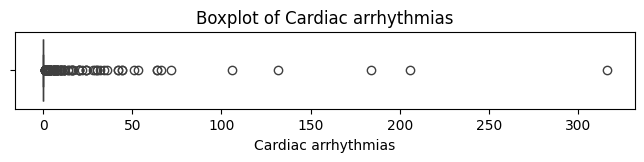

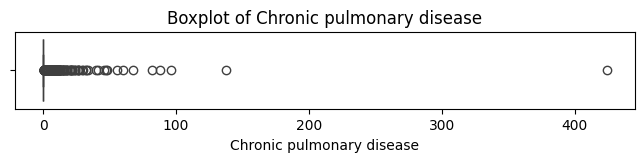

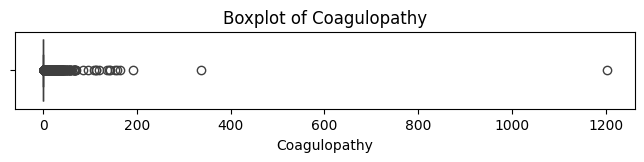

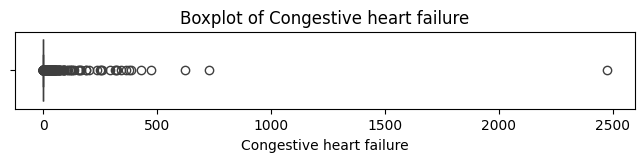

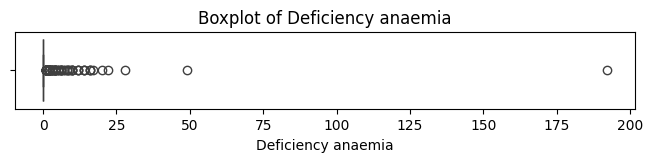

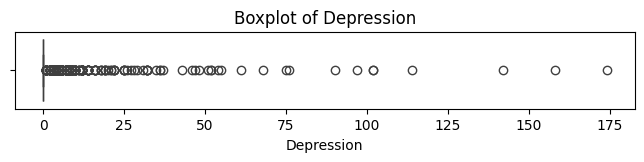

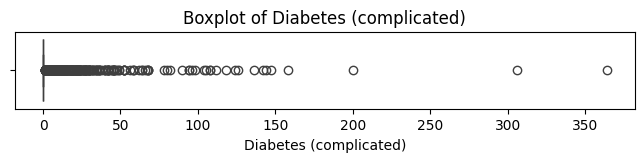

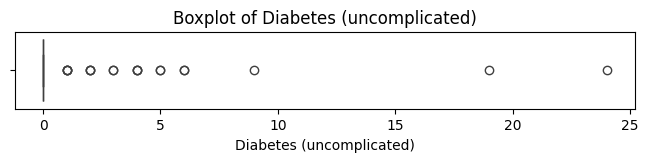

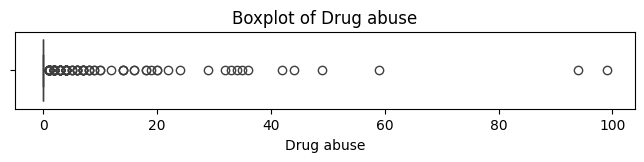

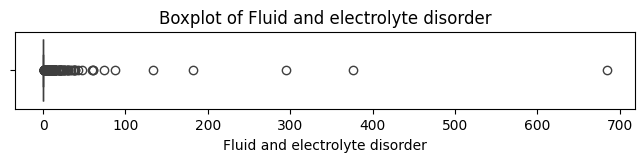

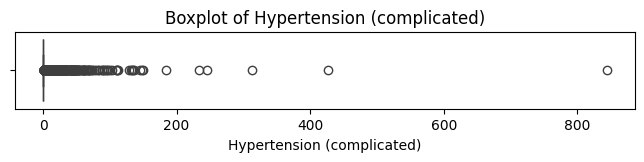

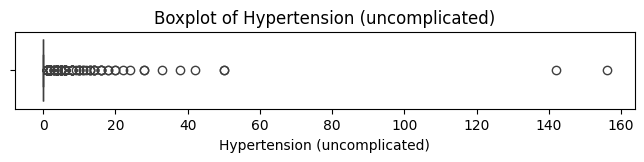

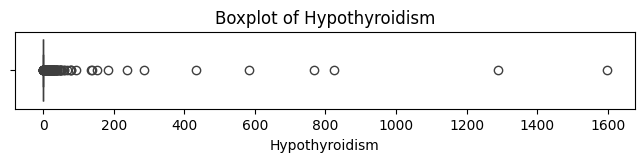

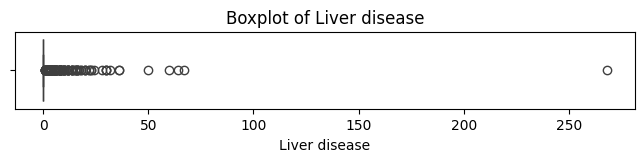

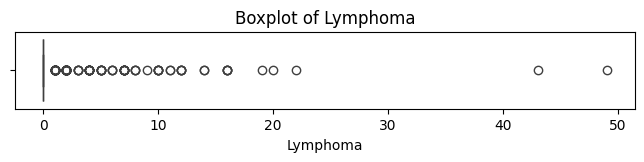

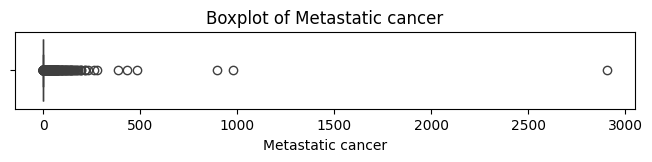

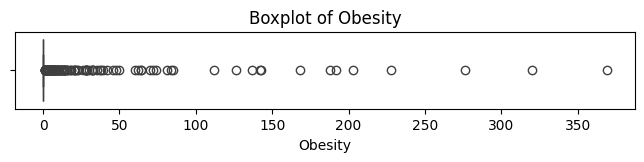

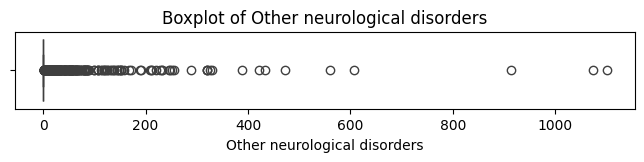

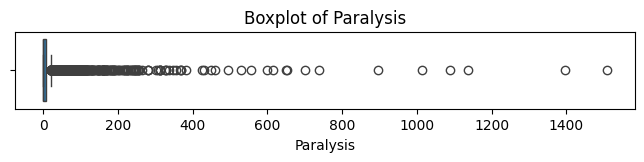

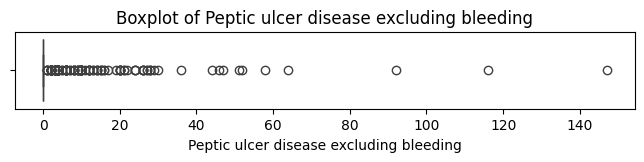

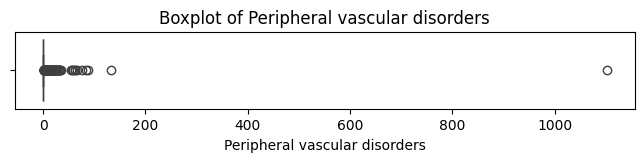

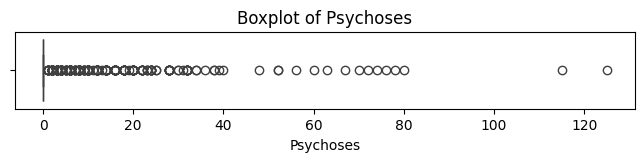

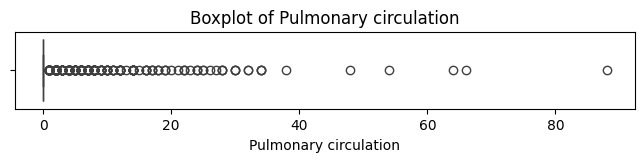

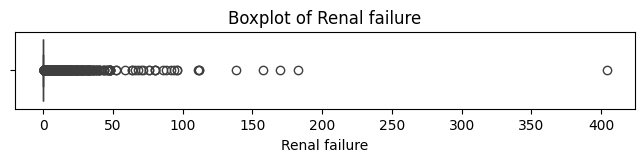

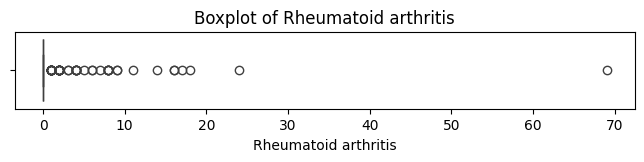

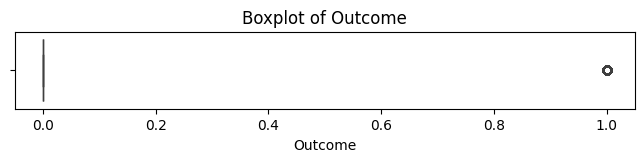

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each numerical column
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
outliers = {}
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers[col] = outlier_indices.tolist()
    print(f'{col}: {len(outlier_indices)} outliers')

AIDS/HIV: 0 outliers
Alcohol abuse: 1 outliers
Blood loss anaemia: 921 outliers
Cardiac arrhythmias: 126 outliers
Chronic pulmonary disease: 265 outliers
Coagulopathy: 817 outliers
Congestive heart failure: 304 outliers
Deficiency anaemia: 107 outliers
Depression: 269 outliers
Diabetes (complicated): 484 outliers
Diabetes (uncomplicated): 19 outliers
Drug abuse: 136 outliers
Fluid and electrolyte disorder: 221 outliers
Hypertension (complicated): 872 outliers
Hypertension (uncomplicated): 122 outliers
Hypothyroidism: 259 outliers
Liver disease: 143 outliers
Lymphoma: 124 outliers
Metastatic cancer: 1203 outliers
Obesity: 130 outliers
Other neurological disorders: 447 outliers
Paralysis: 843 outliers
Peptic ulcer disease excluding bleeding: 131 outliers
Peripheral vascular disorders: 151 outliers
Psychoses: 337 outliers
Pulmonary circulation: 354 outliers
Renal failure: 654 outliers
Rheumatoid arthritis: 57 outliers
Outcome: 1231 outliers


In [ ]:
df = df.drop(columns=['Blood loss anaemia', 'Congestive heart failure', 'Diabetes (complicated)', 'Hypertension (complicated)', 'Metastatic cancer', 'Other neurological disorders', 'Psychoses', 'Renal failure', 'Pulmonary circulation'])

In [ ]:
df

,AIDS/HIV,Alcohol abuse,Cardiac arrhythmias,Chronic pulmonary disease,Coagulopathy,Deficiency anaemia,Depression,Diabetes (uncomplicated),Drug abuse,Fluid and electrolyte disorder,Hypertension (uncomplicated),Hypothyroidism,Liver disease,Lymphoma,Obesity,Paralysis,Peptic ulcer disease excluding bleeding,Peripheral vascular disorders,Rheumatoid arthritis,Outcome
0,1,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,66,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1
2,1,89,0,0,1,0,52,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,69,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1
4,0,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,1,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6632,1,66,0,10,22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6633,0,54,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0
6634,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import accuracy_score, f1_score

# Load your data
df = pd.read_csv('https://raw.githubusercontent.com/muajnstu/Comparative-Analysis-of-K-Nearest-Neighbors-Variants-for-Diabetes-Prediction-Using-Administrative-He/refs/heads/main/update_dataframe%20(1).csv')
target = 'Outcome'

# Step 1: Detect outliers in all numerical columns using IQR method
def find_outliers_all_columns(df):
    outlier_mask = pd.Series([False] * len(df), index=df.index)
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_mask = outlier_mask | (df[col] < lower) | (df[col] > upper)
    return outlier_mask

outlier_mask = find_outliers_all_columns(df.drop(columns=[target]))

# Step 2:
df_with_outliers = df.copy()
df_without_outliers = df.loc[~outlier_mask].copy()


def evaluate_model(data, target):
    X = data.drop(columns=[target])
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

# Step 3:
print("Performance WITH outliers:")
with_outliers_score = evaluate_model(df_with_outliers, target)
print(with_outliers_score)

print("\nPerformance WITHOUT outliers:")
without_outliers_score = evaluate_model(df_without_outliers, target)
print(without_outliers_score)

print(f"\nNumber of rows with outliers detected and removed: {outlier_mask.sum()}")

Performance WITH outliers:
{'accuracy': 0.7612951807228916, 'f1_score': 0.7247597780166093}

Performance WITHOUT outliers:
{'accuracy': 0.5887323943661972, 'f1_score': 0.5905550576184379}

Number of rows with outliers detected and removed: 4864
